# Questão 1

## A nota geral do ENADE dos cursos é influenciada pelo custo aluno? Isto é, quanto mais caro o aluno, mais investimento é feito e maior é a nota?

In [76]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [77]:
# Carregando os dados
ies_custo = pd.read_csv('./custo_ies_federais_brasil.csv')

In [78]:
ies_custo['custoAluno'] = pd.to_numeric(ies_custo['custoAluno'])
ies_custo = ies_custo.rename(columns={'Instituicao': 'instituicao', 'Sigla': 'sigla', 'despesaLiquidada': 'despesa_liquidada', 'totalAlunos': 'total_alunos', 'custoAluno': 'custo_aluno'})
ies_custo

,instituicao,sigla,despesa_liquidada,total_alunos,custo_aluno
0,UNIVERSIDADE FEDERAL DO ACRE (UFAC),UFAC,286.2,9732,29412.1
1,UNIVERSIDADE FEDERAL DE ALAGOAS (UFAL),UFAL,802.8,23741,33813.6
2,UNIVERSIDADE FEDERAL DO AMAZONAS (UFAM),UFAM,663.5,32203,20603.9
3,UNIVERSIDADE FEDERAL DO AMAPÁ (UNIFAP),UNIFAP,152.7,10796,14148.7
4,UNIVERSIDADE FEDERAL DA BAHIA (UFBA),UFBA,1480.0,41445,35709.2
...,...,...,...,...,...
58,UNIVERSIDADE FEDERAL DE SERGIPE (UFS),UFS,635.4,30060,21138.2
59,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC (UFABC),UFABC,229.4,13203,17377.8
60,UNIVERSIDADE FEDERAL DE SÃO CARLOS (UFSCAR),UFSCAR,537.4,16404,32762.6
61,UNIVERSIDADE FEDERAL DE SÃO PAULO (UNIFESP),UNIFESP,1199.9,14784,81161.8


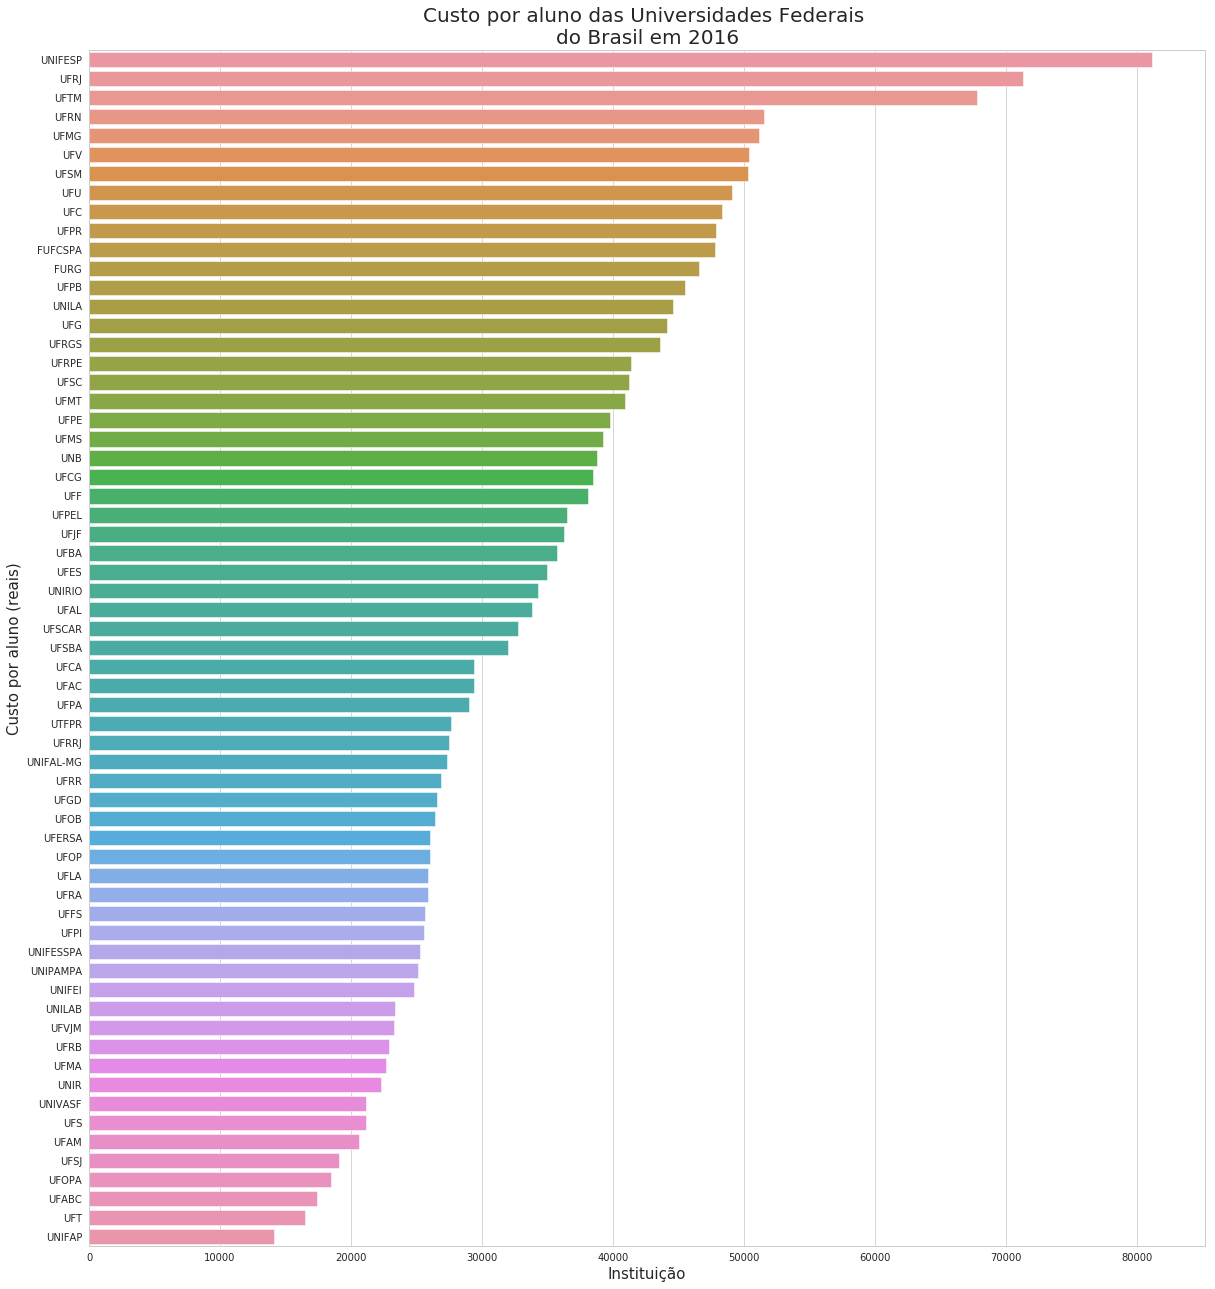

In [79]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(20,22))

# Gerando a figura
ax = sns.barplot(y='sigla', x='custo_aluno', data=ies_custo.sort_values(by='custo_aluno', ascending=False))

# Título da Figura
ax.set_title('Custo por aluno das Universidades Federais \ndo Brasil em 2016', fontsize=20)

# Definindo o nome do eixo horizontal
ax.set_ylabel('Instituição', fontsize=15)

# Definindo o nome do eixo vertical
ax.set_xlabel('Custo por aluno (reais)', fontsize=15)

# Exibindo a figura sem mensagem de retorno
plt.show()

In [148]:
resultados_enade_tudo = pd.read_csv('ENADE2017/dados/resultados_conceito_enade_2017.csv')

### Custo por aluno X Conceito médio do Enade por Instituição

In [183]:
siglas_ies = list(ies_custo['sigla'])
resultados_enade_ies_tudo = resultados_enade_tudo[resultados_enade_tudo['Sigla da IES'].isin(siglas_ies)]
resultados_enade_ies_tudo = resultados_enade_ies_tudo[resultados_enade_ies_tudo['Conceito Enade (Faixa)'] != 'SC']
resultados_enade_ies = resultados_enade_ies_tudo.filter(['Sigla da IES', 'Conceito Enade (Contínuo)'])

resultados_enade_ies = resultados_enade_ies.rename(columns={"Sigla da IES": "sigla", "Conceito Enade (Contínuo)": "enade"}, errors="raise")

resultados_enade_ies['enade'].replace(regex=True, inplace=True, to_replace=r'\,\\?', value=r'.')
resultados_enade_ies['enade'] = pd.to_numeric(resultados_enade_ies['enade'])

resultados_media = resultados_enade_ies.groupby('sigla').mean()
resultados_media['enade'] = resultados_media['enade'].apply(np.ceil)
resultados_media['enade'] = resultados_media['enade'].astype(int)
resultados_enade = resultados_media.reset_index()
resultados_enade


,sigla,enade
0,FURG,3
1,UFABC,4
2,UFAC,3
3,UFAL,3
4,UFAM,3
...,...,...
56,UNIPAMPA,3
57,UNIR,2
58,UNIRIO,4
59,UNIVASF,4


In [124]:
enade_custo = pd.merge(ies_custo, resultados_enade, how='inner', left_on='sigla', right_on='sigla')
enade_custo

,instituicao,sigla,despesa_liquidada,total_alunos,custo_aluno,enade
0,UNIVERSIDADE FEDERAL DO ACRE (UFAC),UFAC,286.2,9732,29412.1,3
1,UNIVERSIDADE FEDERAL DE ALAGOAS (UFAL),UFAL,802.8,23741,33813.6,3
2,UNIVERSIDADE FEDERAL DO AMAZONAS (UFAM),UFAM,663.5,32203,20603.9,3
3,UNIVERSIDADE FEDERAL DO AMAPÁ (UNIFAP),UNIFAP,152.7,10796,14148.7,2
4,UNIVERSIDADE FEDERAL DA BAHIA (UFBA),UFBA,1480.0,41445,35709.2,4
...,...,...,...,...,...,...
56,UNIVERSIDADE FEDERAL DE SERGIPE (UFS),UFS,635.4,30060,21138.2,3
57,FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC (UFABC),UFABC,229.4,13203,17377.8,4
58,UNIVERSIDADE FEDERAL DE SÃO CARLOS (UFSCAR),UFSCAR,537.4,16404,32762.6,4
59,UNIVERSIDADE FEDERAL DE SÃO PAULO (UNIFESP),UNIFESP,1199.9,14784,81161.8,4


In [125]:
enade_group_filtrado = enade_custo_unico.filter(['custo_aluno', 'enade_faixa'])
enade_group_filtrado

,custo_aluno,enade_faixa
1403,47851.4,5
523,49073.4,5
585,50401.8,5
1452,27643.3,5
1911,46578.9,5
...,...,...
273,23394.0,4
220,29421.6,4
208,22927.3,4
138,14148.7,4


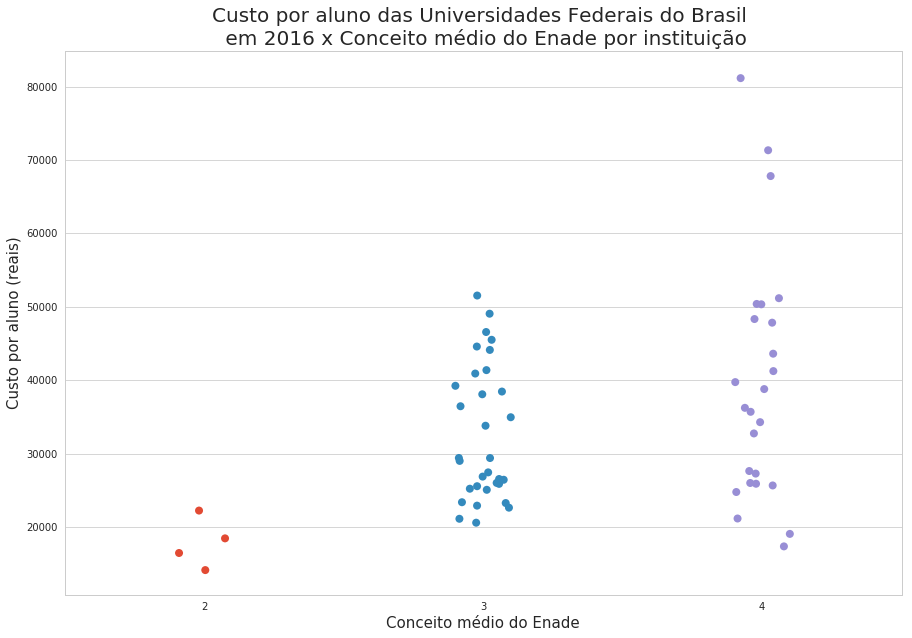

In [196]:
fig, gph = plt.subplots(figsize=(15,10))

gph = sns.stripplot(x='enade', y='custo_aluno', data=enade_custo_filtrado.sort_values(by='enade', ascending=True), s=8, lw=1)

gph.set_title('Custo por aluno das Universidades Federais do Brasil \n em 2016 x Conceito médio do Enade por instituição', fontsize=20)

gph.set_xlabel('Conceito médio do Enade', fontsize=15)

gph.set_ylabel('Custo por aluno (reais)', fontsize=15)

plt.show()

### Custo por aluno X Nota do Enade por curso

In [186]:
resultados_enade_cursos_faixa = resultados_enade_ies_tudo.filter(['Sigla da IES', 'Conceito Enade (Faixa)']).rename(columns={"Sigla da IES": "sigla", "Conceito Enade (Faixa)": "conceito_enade"}, errors="raise").reset_index()
resultados_enade_cursos_faixa

,index,sigla,conceito_enade
0,0,UFMT,5
1,1,UNB,5
2,2,UNB,4
3,3,UFS,4
4,4,UFAM,4
...,...,...,...
2229,10421,UFCG,4
2230,10422,UFCG,3
2231,10424,UFT,2
2232,10425,UFT,2


In [187]:
ies_custo_aluno = ies_custo.filter(['sigla', 'custo_aluno'])
ies_custo_aluno

,sigla,custo_aluno
0,UFAC,29412.1
1,UFAL,33813.6
2,UFAM,20603.9
3,UNIFAP,14148.7
4,UFBA,35709.2
...,...,...
58,UFS,21138.2
59,UFABC,17377.8
60,UFSCAR,32762.6
61,UNIFESP,81161.8


In [188]:
enade_custo_curso = pd.merge(ies_custo_aluno, resultados_enade_cursos_faixa, how='inner', left_on='sigla', right_on='sigla')
enade_custo_curso = enade_custo_curso.filter(['custo_aluno', 'conceito_enade'])
# enade_custo_curso = enade_custo_curso[enade_custo_curso['conceito_enade'] != 'SC']
enade_custo_curso

,custo_aluno,conceito_enade
0,29412.1,3
1,29412.1,4
2,29412.1,3
3,29412.1,3
4,29412.1,3
...,...,...
2229,16476.7,2
2230,16476.7,4
2231,16476.7,3
2232,16476.7,2


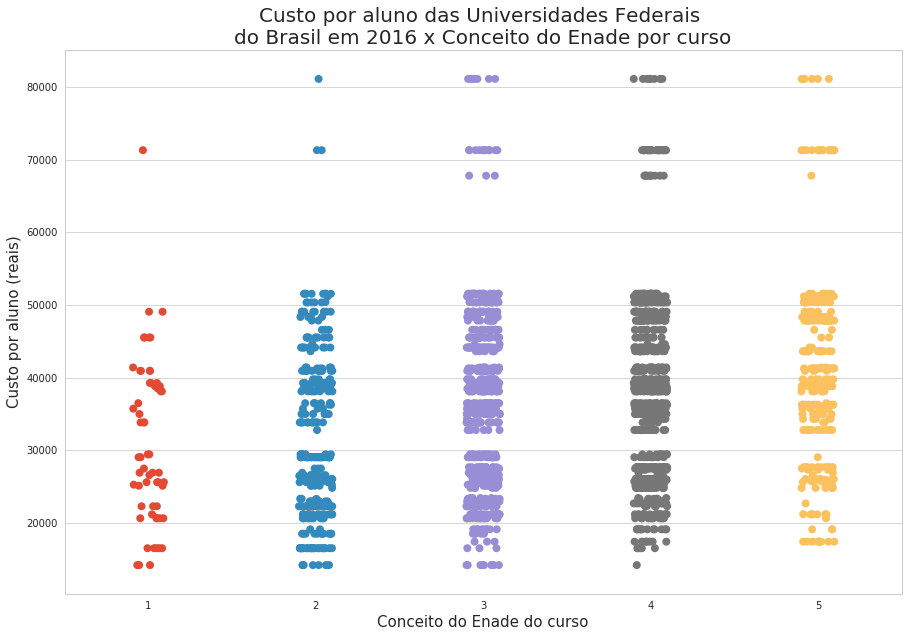

In [193]:
fig, gph = plt.subplots(figsize=(15,10))

gph = sns.stripplot(x='conceito_enade', y='custo_aluno', data=enade_custo_curso.sort_values(by='conceito_enade', ascending=True), s=8, lw=1)

gph.set_title('Custo por aluno das Universidades Federais \ndo Brasil em 2016 x Conceito do Enade por curso', fontsize=20)

gph.set_xlabel('Conceito do Enade do curso', fontsize=15)

gph.set_ylabel('Custo por aluno (reais)', fontsize=15)

plt.show()

### Comparando menor custo por aluno com o maior custo por aluno